In [5]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
print(train_labels)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8026 - accuracy: 0.3262 - val_loss: 1.2934 - val_accuracy: 0.5284
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2438 - accuracy: 0.5517 - val_loss: 1.1600 - val_accuracy: 0.5855
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0594 - accuracy: 0.6267 - val_loss: 0.9920 - val_accuracy: 0.6491
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9408 - accuracy: 0.6676 - val_loss: 1.0221 - val_accuracy: 0.6425
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8692 - accuracy: 0.6934 - val_loss: 0.9194 - val_accuracy: 0.6754
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7997 - accuracy: 0.7181 - val_loss: 0.9240 - val_accuracy: 0.6849
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7587 - accuracy: 0.7302 - val_loss: 0.8911 - val_accuracy:

313/313 - 1s - loss: 1.1086 - accuracy: 0.6900


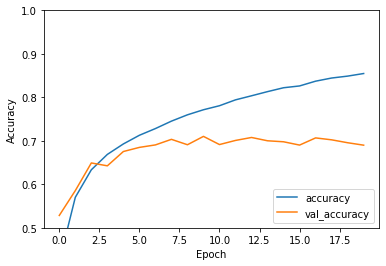

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)